# matplotlib tutorial

## 目次

- [matplotlibとは？](#what)
- [参考資料](#reference)
- [簡単な使い方](#easy)
    - [import](#import)
    - [線グラフ](#line)
    - [散布図](#scatter)
    - [スタイル変更](#style)
    - [ヒストグラム](#hist)
    - [画像描画](#image)
    - [描画範囲指定](#limit)
    - [複数グラフ描画](#multi)
    - [サブプロット描画](#subplot)
- [複雑な描画](#complicated)
    - [軸を揃える](#axis)
    - [複数グラフの連結](#join)
- [おまけ：ギャラリー](#gallery)
    - [3D](#function)
    - [stackplot](#stackplot)
    - [カラープロッティング](#color)
    - [画像プロッティング](#image2)


 <a name = "what"></a>

## matplotlibとは

Pythonでの描画ライブラリ。
様々なプロッティングが可能

 <a name = "reference"></a>

## 参考資料

- [matplotlib](http://matplotlib.org/)
- [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html)
- [Gallery](http://matplotlib.org/gallery.html)

 <a name = "easy"></a>

## 簡単な使い方
pyplotモジュールの関数を使う

 <a name = "import"></a>

### import


In [40]:
import numpy as np
import matplotlib.pyplot as plt # pltとするのが通例
%matplotlib inline  
# notebook内に出力するために必要

 <a name = "line"></a>

###  線グラフ描画

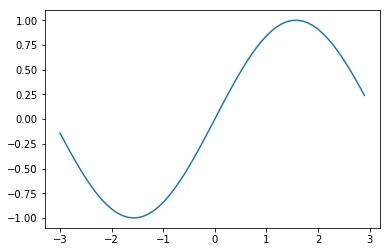

In [41]:
# データ作成
x = np.arange(-3, 3, 0.1)
y = np.sin(x)

# プロット(引数はx軸、y軸)
plt.plot(x, y)

 <a name = "satter"></a>

### 散布図

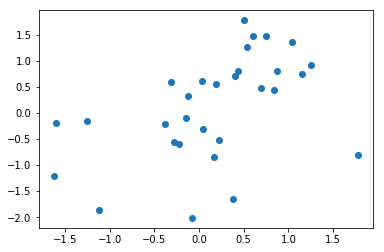

In [42]:
# データ作成
x = np.random.randn(30)
y = np.sin(x) + np.random.randn(30)

# "o"で小さい円描写
plt.plot(x, y, "o")

 <a name = "style"></a>

### スタイル変更

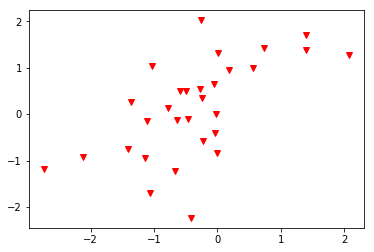

In [43]:
x = np.random.randn(30)
y = np.sin(x) + np.random.randn(30)

# rで赤色指定 vで逆三角
plt.plot(x, y, "rv")

そのほかのプロッティングパラメータは[pyplot.plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)を参照

 <a name = "hist"></a>

### ヒストグラム描画

(array([  2.,   8.,  43., 136., 214., 294., 189.,  79.,  28.,   7.]),
 array([-3.64537554, -2.95215209, -2.25892865, -1.5657052 , -0.87248175,
        -0.17925831,  0.51396514,  1.20718859,  1.90041203,  2.59363548,
         3.28685893]),
 <a list of 10 Patch objects>)

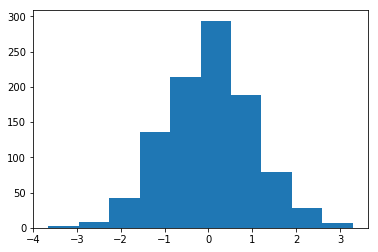

In [44]:
# 正規表現を.histでヒストグラム描画
plt.hist(np.random.randn(1000))

 <a name = "image"></a>

### 画像描画

Text(0.5, 1.0, '100x100 matrix')

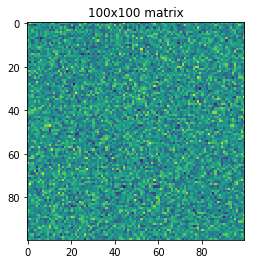

In [45]:
# 100 ×100 の画像を表示（画像解析や機械学習でよく使う）
plt.imshow(np.random.randn(100, 100))

#titleを追加
plt.title("100x100 matrix")

 <a name = "limit"></a>

### 描画範囲指定

(0, 5000)

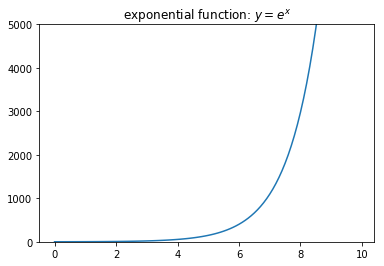

In [46]:
x = np.arange(0, 10, 0.1)
y = np.exp(x)
plt.plot(x, y)

# テキストはLaTeXで数式入れられる
plt.title("exponential function: $ y = e^x $")

# ylimでy軸を0-5000の範囲に限定
plt.ylim(0, 5000)  

LaTeXは[こちら](http://matplotlib.org/users/usetex.html)を参照

 <a name = "multi"></a>

### 複数グラフ描画

(-1.3, 1.3)

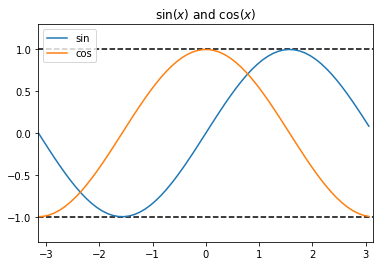

In [47]:
# データ作成
xmin, xmax = -np.pi, np.pi
x = np.arange(xmin, xmax, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# sin,cosグラフ描画。labelで凡例（legendの指定）
plt.plot(x, y_sin, label="sin")
plt.plot(x, y_cos,label="cos")

# plt.legendで凡例描画。locで場所指定
plt.legend(loc="upper left")


# y=-1, 1に破線を描画
plt.hlines([-1, 1], xmin, xmax, linestyles="dashed")

# タイトル
plt.title(r"$\sin(x)$ and $\cos(x)$")


# xlim、ylimで描画範囲指定
plt.xlim(xmin, xmax)
plt.ylim(-1.3, 1.3)

 <a name = "subplot"></a>

### サブプロット描画
plt.subplot(行数, 列数, 何番目のプロットか)で指定

(-1.3, 1.3)

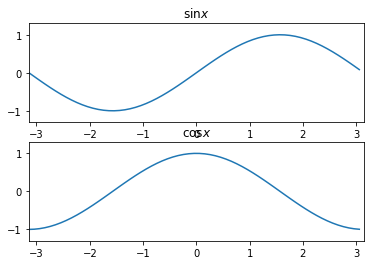

In [48]:
# sinのプロット
plt.subplot(2, 1, 1)
plt.plot(x, y_sin)
plt.title(r"$\sin x$")
plt.xlim(xmin, xmax)
plt.ylim(-1.3, 1.3)

# cosのプロット
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title(r"$\cos x$")
plt.xlim(xmin, xmax)
plt.ylim(-1.3, 1.3)

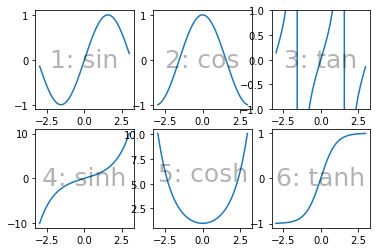

In [49]:
def plot_function_name(name, x=0, y=0):
    # グラフ中央に文字出す
    plt.text(x, y, name, alpha=0.3, size=25, ha="center", va="center")

    
x = np.arange(-3, 3.01, 0.01) # 3.01

# plt.subplotの引数は区切らなくてもいい
plt.subplot(231)
plot_function_name("1: sin")
plt.plot(x, np.sin(x))

plt.subplot(232)
plot_function_name("2: cos")
plt.plot(x, np.cos(x))

plt.subplot(233)
plot_function_name("3: tan")
plt.plot(x, np.tan(x))
plt.ylim(-1, 1)  # y軸が無限まで行ってしまうので制限

plt.subplot(234)
plot_function_name("4: sinh")
plt.plot(x, np.sinh(x))

plt.subplot(235)
plot_function_name("5: cosh", x=0, y=6)
plt.plot(x, np.cosh(x))

plt.subplot(236)
plot_function_name("6: tanh")
plt.plot(x, np.tanh(x))

<a name = "complicated"></a>

---
## 複雑な使い方

pyplotの関数は、内部的にはmatplotlibの他クラスを呼び出している。<br>
簡単に使えるが、細かい設定をする場合は他クラスを直接呼び出す必要がある。

 <a name = "axis"></a>

### 軸を揃える

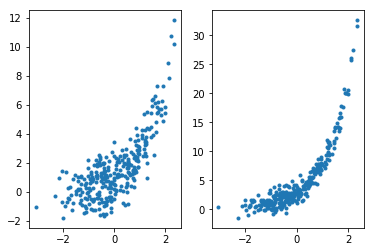

In [50]:
n = 300
x = np.random.randn(n)
y1 = np.exp(x) + np.random.randn(n)
y2 = np.exp(x) * 3 + np.random.randn(n)

# figureオブジェクトを明示的に作る
# figureオブジェクト： 作図全体
fig = plt.figure()

# figureオブジェクトにサブプロットを作る
# サブプロット: グラフ
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(x, y1, ".")
ax2.plot(x, y2, ".")

↑のy軸を合わせる

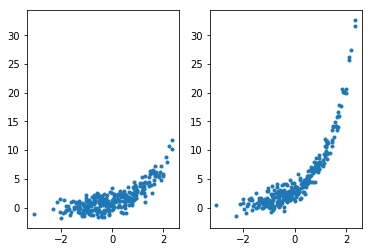

In [51]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
# 明示的にshareyでy軸をax1と揃える
ax2 = fig.add_subplot(122, sharey=ax1)

ax1.plot(x, y1, ".")
ax2.plot(x, y2, ".")

 <a name = "join"></a>

### 複数グラフの連結

(array([ 2.,  2.,  2.,  3.,  2.,  4.,  8.,  7.,  6., 15., 10., 15., 18.,
        10., 17., 20., 15., 26., 23.,  7., 14., 16., 11., 10.,  7., 12.,
         7.,  4.,  4.,  3.]),
 array([-2.35059448, -2.21336428, -2.07613408, -1.93890388, -1.80167368,
        -1.66444348, -1.52721328, -1.38998308, -1.25275288, -1.11552268,
        -0.97829248, -0.84106228, -0.70383208, -0.56660188, -0.42937168,
        -0.29214148, -0.15491128, -0.01768108,  0.11954912,  0.25677932,
         0.39400952,  0.53123972,  0.66846992,  0.80570012,  0.94293032,
         1.08016052,  1.21739072,  1.35462092,  1.49185112,  1.62908132,
         1.76631152]),
 <a list of 30 Patch objects>)

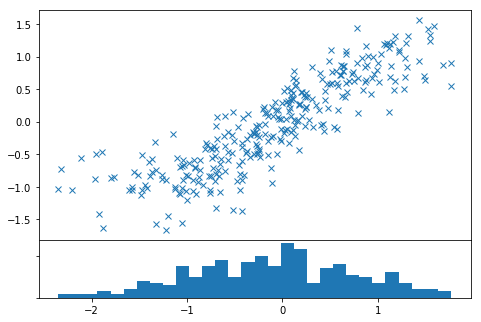

In [52]:
n = 300
x = np.random.randn(n)
y = np.sin(x) + np.random.randn(n) * 0.3

fig = plt.figure()

# サブプロットを8:2で分割
# 下から0.2〜1までの0.8の範囲をax1
ax1 = fig.add_axes((0, 0.2, 1, 0.8))

# 下から0〜0.2までの0.2の範囲をax2。x軸をax1と揃える
ax2 = fig.add_axes((0, 0, 1, 0.2), sharex=ax1)

# 散布図のx軸のラベルとヒストグラムのy軸のラベルを非表示
ax1.tick_params(labelbottom="off")
ax2.tick_params(labelleft="off")

ax1.plot(x, y, "x")
ax2.hist(x, bins=30)  # binsで分割するサイズを指定

 <a name = "gallery"></a>

---


## おまけ：ギャラリー

### 散布＆ヒストグラム

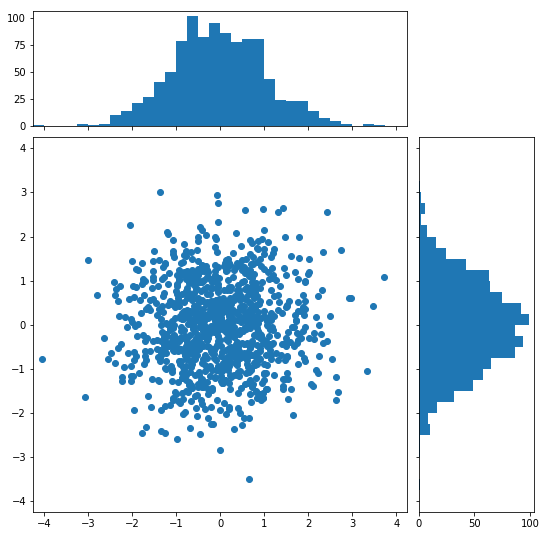

In [53]:
from matplotlib.ticker import NullFormatter

# 正規分布のデータを生成
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt = NullFormatter()         # ラベル無し

# axesの定義
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# figureとaxes
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# ヒストグラムのラベルを無効に
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# 散布図
axScatter.scatter(x, y)

# リミットの設定
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))]) # xymax: xとyの最大値の内の大きい方
lim = (int(xymax/binwidth) + 1) * binwidth  # マージンを空けて整数に

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

### 3D

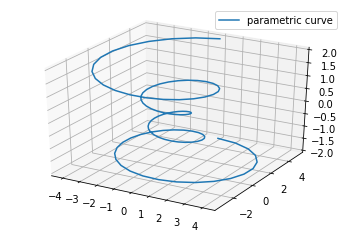

In [54]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

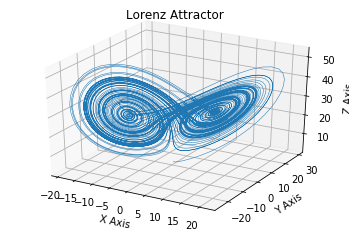

In [55]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

### stackplot

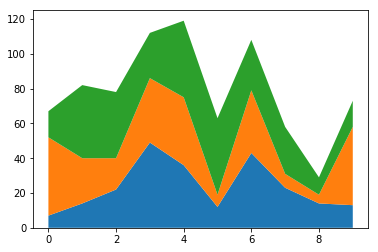

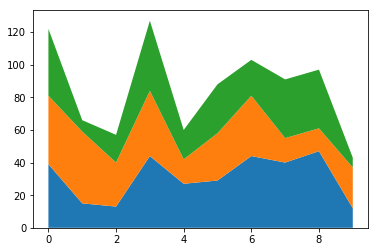

In [56]:
def fnx():
    return np.random.randint(5, 50, 10)

y = np.row_stack((fnx(), fnx(), fnx()))
x = np.arange(10)

y1, y2, y3 = fnx(), fnx(), fnx()

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3)
plt.show()

### カラープロッティング

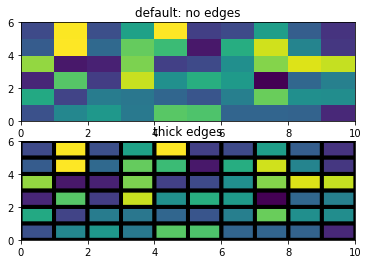

In [57]:
from numpy.random import rand

Z = rand(6, 10)

plt.subplot(2, 1, 1)
c = plt.pcolor(Z)  # 色のプロッティング
plt.title('default: no edges')

plt.subplot(2, 1, 2)
c = plt.pcolor(Z, edgecolors='k', linewidths=4)
plt.title('thick edges')

plt.show()

### 画像のプロッティング

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


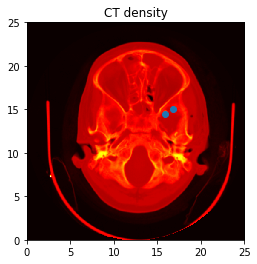

In [58]:
import matplotlib.cbook as cbook

w, h = 512, 512

datafile = cbook.get_sample_data('ct.raw.gz', asfileobj=True)
s = datafile.read()
A = np.fromstring(s, np.uint16).astype(float)
A *= 1.0 / max(A)
A.shape = w, h

extent = (0, 25, 0, 25)
im = plt.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
plt.plot(x, y, 'o')

plt.title('CT density')

plt.show()